In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

In [2]:
mnist = tf.keras.datasets.mnist
(trainx,trainy),(testx,testy)=mnist.load_data()

trainx=trainx.reshape(trainx.shape[0],trainx.shape[1],trainx.shape[2],1).astype('float32')
testx=testx.reshape(testx.shape[0],testx.shape[1],testx.shape[2],1).astype('float32')

trainy=tf.keras.utils.to_categorical(trainy,10)
testy=tf.keras.utils.to_categorical(testy,10)

In [3]:
filter_input=(5,5)
filter_hidden=(3,3)
data_format='channels_last'
pool=(2,2)

trainx/=255
testx/=255


In [8]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,filter_input,activation='relu'))
model.add(keras.layers.MaxPool2D(pool))
model.add(keras.layers.Conv2D(32,filter_hidden,activation='relu'))
model.add(keras.layers.MaxPool2D(pool))



model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history=model.fit(trainx,trainy,validation_data=(testx,testy),epochs=50,batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 109us/step - loss: 0.0533 - acc: 0.9837 - val_loss: 0.0317 - val_acc: 0.9887
Epoch 2/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.0328 - acc: 0.9901 - val_loss: 0.0287 - val_acc: 0.9904
Epoch 3/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.0262 - acc: 0.9916 - val_loss: 0.0285 - val_acc: 0.9903
Epoch 4/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.0194 - acc: 0.9937 - val_loss: 0.0238 - val_acc: 0.9919
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.0150 - acc: 0.9950 - val_loss: 0.0265 - val_acc: 0.9916
Epoch 6/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.0130 - acc: 0.9959 - val_loss: 0.0335 - val_acc: 0.9895
Epoch 7/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.0111 - acc: 0.9962 - val_loss: 0.0238 - val

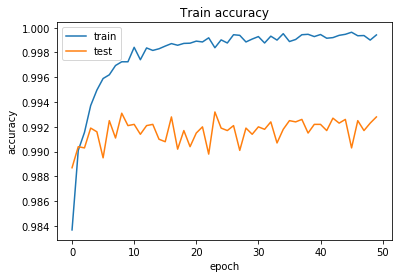

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()